In [12]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, func ,distinct,inspect
import numpy as np
import pandas as pd
import datetime as dt
import datetime

# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import datetime

In [2]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [3]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)
# reflect the tables

In [4]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [5]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [9]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

### # Get a list of column names and types

In [10]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [93]:
# from datetime import datetime
# # Maximum date data available in database
# max_date_in_db = session.query(func.max(measurement.date)).one()
# max_date_in_db = datetime.strptime(max_date_in_db[0], '%Y-%m-%d')
# one_year_before_maxdate = datetime(max_date_in_db.year -1, max_date_in_db.month, max_date_in_db.day)
# query_result = session.query(measurement.id,measurement.station,measurement.date,
#                         measurement.prcp,measurement.tobs).filter(measurement.date 
#                                                                   >one_year_before_maxdate).filter(measurement.date 
#                                                                   <= max_date_in_db).all()
# for row in query_result:
#     print(row)


##### Calculate the date 1 year ago from the last data point in the database

In [94]:
max_date_in_db = session.query(func.max(measurement.date)).one()
max_date_in_db = datetime.strptime(max_date_in_db[0], '%Y-%m-%d')

last_year_date = datetime(max_date_in_db.year -1, max_date_in_db.month, max_date_in_db.day)
print(f'Max Date in database: {max_date_in_db}, Last Year Date From Max Date in DB:{last_year_date}')

Max Date in database: 2017-08-23 00:00:00, Last Year Date From Max Date in DB:2016-08-23 00:00:00


#### Perform a query to retrieve the data and precipitation scores

In [95]:
prcp_query_result = session.query(measurement.date,
                        measurement.prcp).filter(measurement.date 
                                                >one_year_before_maxdate).filter(measurement.date 
                                                <= max_date_in_db).all()
for row in prcp_query_result:
    print(row)

('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.0)
('2016-10-09', 0.0)
('2016-10-10', 0.0)
('2016-10-11', 0.0)
('

### Save the query results as a Pandas DataFrame and set the index to the date column

In [89]:
df_query = pd.DataFrame(prcp_query_result)
df_query_date_idx = df_query.set_index('date')
df_query_date_idx.head(5)

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


### Sort the dataframe by date

In [97]:
sorted_df_prcp = df_query_date_idx.sort_index()
sorted_df_prcp.head(3)

,prcp
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15


### Use Pandas Plotting with Matplotlib to plot the data

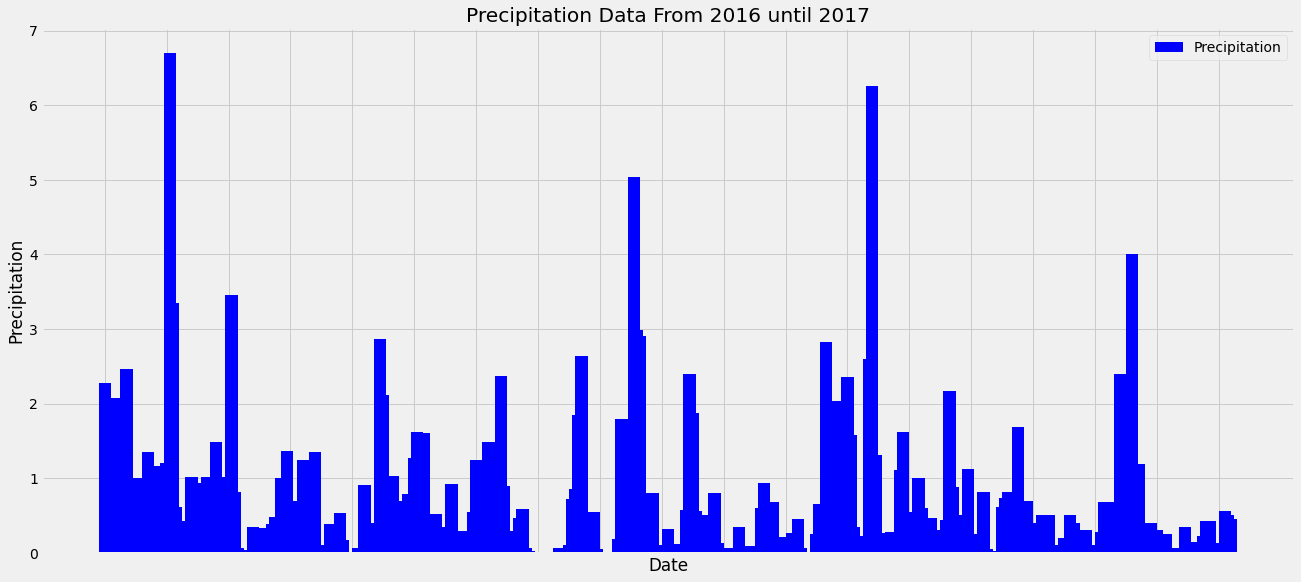

In [148]:
xaxis = sorted_df_prcp.index.tolist()
yaxis = sorted_df_prcp["prcp"].tolist()
#plt.figure(figsize)
plt.figure(figsize=(20,9))
plt.tick_params(axis='x', which='both',labelbottom=False)  
major_ticks = np.arange(0,365,20)
plt.xticks(major_ticks)
plt.bar(xaxis,yaxis,width = 4 ,color='b',label='Precipitation', align='center')
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.title(f'Precipitation Data From {last_year_date.year} until {max_date_in_db.year}')
plt.legend()
plt.grid(which='major', axis='both', linestyle='-')
plt.show()

### Use Pandas to calcualte the summary statistics for the precipitation data

In [30]:
df_query_date_idx["prcp"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64

### Design a query to show how many stations are available in this dataset?

In [149]:
distinct_count_station_in_dataset= session.query(func.count(distinct(measurement.station))).all()
print(f'Number of Unique stations available in DataSet 12 months record : {distinct_count_station_in_dataset[0]}')

Number of Unique stations available in DataSet 12 months record : (9,)


### What are the most active stations? (i.e. what stations have the most rows)?
##### List the stations and the counts in descending order.


In [31]:
sel = [measurement.station,func.count(measurement.station)]
active_stations = session.query(*sel).group_by(measurement.station).\
                  order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

### Using the station id from the previous query, calculate the lowest temperature recorded, 
### highest temperature recorded, and average temperature of the most active station?


In [54]:
#inspector.get_columns('measurement')

In [160]:
most_active_station_id = active_stations[0].station
sel = [measurement.station,func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)]
most_active_station_temp = session.query(*sel).filter(measurement.station==most_active_station_id)
for row in most_active_station_temp:
    print(f'Active Station: {row[0]} Min Temp: {row[1]} Max Temp: {row[2]} Avg Temp: {row[3]}')


Active Station: USC00519281 Min Temp: 54.0 Max Temp: 85.0 Avg Temp: 71.66378066378067


### Choose the station with the highest number of temperature observations.


In [162]:
sel = [measurement.station,func.count(measurement.tobs)]
most_number_of_tobs_station = session.query(*sel).filter \
                              (measurement.date >one_year_before_maxdate).filter\
                              (measurement.date <= max_date_in_db).group_by(measurement.station).\
                              order_by(func.count(measurement.tobs).desc()).first()
most_number_of_tobs_station_id = most_number_of_tobs_station[0]
print(f'Station with Highest Number of tobs : {most_number_of_tobs_station_id}')

Station with Highest Number of tobs : USC00519397


####     Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [163]:
most_number_of_tobs_station = session.query(measurement.date,measurement.tobs).filter \
                              (measurement.date >one_year_before_maxdate).filter\
                              (measurement.date <= max_date_in_db).filter(measurement.station==most_number_of_tobs_station_id).all()
hist_plot_df = pd.DataFrame(most_number_of_tobs_station)
hist_plot_df.head(3)

,date,tobs
0,2016-08-24,79.0
1,2016-08-25,80.0
2,2016-08-26,79.0


Text(0, 0.5, 'Frequency')

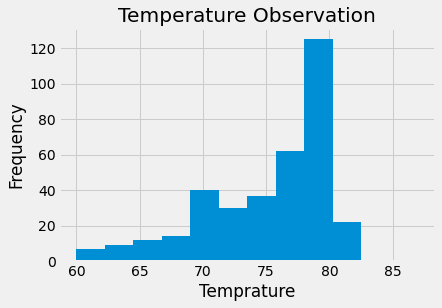

In [83]:
hist_plot = hist_plot_df['tobs'].hist(bins=12)
hist_plot.set_title("Temperature Observation")
hist_plot.set_xlabel("Temprature")
hist_plot.set_ylabel("Frequency")

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
